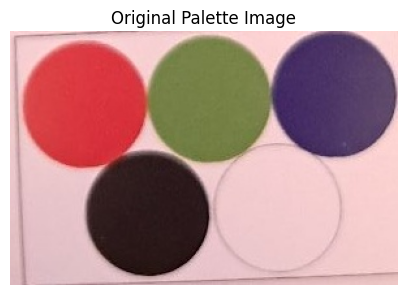

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your cropped palette image (make sure "palette.jpg" is in your working directory)
palette_img = cv2.imread("../Produced Images/Fingernail Palette Yolo Cropped/1709617374918.jpg")
if palette_img is None:
    raise IOError("Error loading image. Please check the file path.")
    
# Display the loaded image (convert BGR to RGB for proper display with matplotlib)
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette Image")
plt.axis("off")
plt.show()


In [2]:
# Convert the image to grayscale and apply a median blur to reduce noise
gray = cv2.cvtColor(palette_img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.medianBlur(gray, 5)

# Use HoughCircles to detect circles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=40,
    maxRadius=100
)

if circles is not None:
    # Round the circle parameters and convert to unsigned 16-bit integers
    circles = np.uint16(np.around(circles[0]))
    print("Detected circles (x, y, radius):")
    print(circles)
else:
    raise ValueError("No circles detected!")



Detected circles (x, y, radius):
[[106 140  48]
 [ 58  56  48]
 [152  52  48]
 [248  48  48]
 [206 136  46]]


In [3]:
measured_colors = []  # To store the average color (B, G, R) for each circle

# Loop through each detected circle
for (x, y, r) in circles:
    # Create a binary mask where the circle is white and the rest is black
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color inside the circle using the mask
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))

print("Measured colors (B, G, R):")
for color in measured_colors:
    print(color)


Measured colors (B, G, R):
(30.390267572438653, 29.36253985858866, 48.94648551226952)
(66.81533342575905, 59.30029114099543, 216.5232219603494)
(72.87134340773603, 129.66158325246084, 120.84611118813254)
(102.18036877859421, 57.12449743518647, 80.83834742825454)
(206.20830188679247, 203.2084528301887, 242.31003773584908)


Measured colors (B, G, R):
Circle 1: (30.390267572438653, 29.36253985858866, 48.94648551226952)
Circle 2: (66.81533342575905, 59.30029114099543, 216.5232219603494)
Circle 3: (72.87134340773603, 129.66158325246084, 120.84611118813254)
Circle 4: (102.18036877859421, 57.12449743518647, 80.83834742825454)
Circle 5: (206.20830188679247, 203.2084528301887, 242.31003773584908)


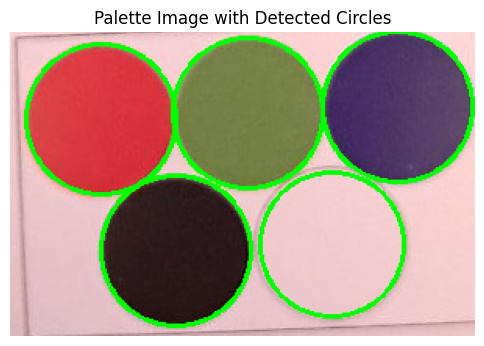

In [4]:
# Assume 'palette_img' is already loaded and 'gray' & 'circles' are computed in previous cells

# Create a copy of the palette image to draw circles on
palette_drawn = palette_img.copy()

measured_colors = []  # List to store the average color for each circle (B, G, R)

# Loop through each detected circle (x, y, radius)
for (x, y, r) in circles:
    # Create a binary mask for the current circle
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color within the circle
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))
    
    # Draw the circle outline on the copied palette image (green outline)
    cv2.circle(palette_drawn, (x, y), r, (0, 255, 0), 2)

# Print the measured colors
print("Measured colors (B, G, R):")
for idx, color in enumerate(measured_colors, start=1):
    print(f"Circle {idx}: {color}")

# Display the palette image with drawn circles using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(palette_drawn, cv2.COLOR_BGR2RGB))
plt.title("Palette Image with Detected Circles")
plt.axis("off")
plt.show()


Measured colors (B, G, R):
Circle 1: (30.390267572438653, 29.36253985858866, 48.94648551226952)
Circle 2: (66.81533342575905, 59.30029114099543, 216.5232219603494)
Circle 3: (72.87134340773603, 129.66158325246084, 120.84611118813254)
Circle 4: (102.18036877859421, 57.12449743518647, 80.83834742825454)
Circle 5: (206.20830188679247, 203.2084528301887, 242.31003773584908)


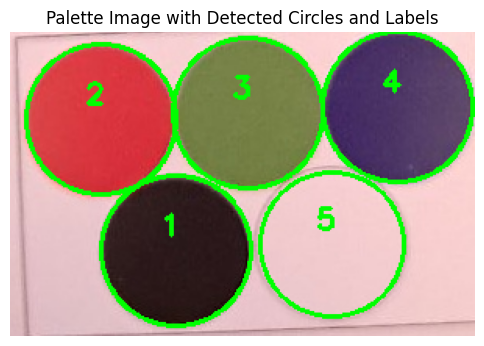

In [5]:
# Assume 'palette_img' is already loaded and 'gray' & 'circles' are computed in previous cells

# Create a copy of the palette image to draw circles and labels on
palette_drawn = palette_img.copy()

measured_colors = []  # List to store the average color for each circle (B, G, R)

# Loop through each detected circle (x, y, radius)
for idx, (x, y, r) in enumerate(circles, start=1):
    # Create a binary mask for the current circle
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.circle(mask, (x, y), r, 255, -1)
    
    # Compute the average color within the circle using the mask
    mean_color = cv2.mean(palette_img, mask=mask)  # Returns (B, G, R, alpha)
    measured_colors.append((mean_color[0], mean_color[1], mean_color[2]))
    
    # Draw the circle outline on the copied palette image (green outline)
    cv2.circle(palette_drawn, (x, y), r, (0, 255, 0), 2)
    
    # Add a label for the circle
    label = f"{idx}"
    # Place the label near the top-left of the circle's center with an offset
    cv2.putText(palette_drawn, label, (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Print the measured colors for each circle
print("Measured colors (B, G, R):")
for idx, color in enumerate(measured_colors, start=1):
    print(f"Circle {idx}: {color}")

# Display the palette image with drawn circles and labels using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(palette_drawn, cv2.COLOR_BGR2RGB))
plt.title("Palette Image with Detected Circles and Labels")
plt.axis("off")
plt.show()


In [6]:
# Define reference colors (in BGR order)
# reference_colors = {
#     "black": (0,   0,   0),
#     "white": (255, 255, 255),
#     "red":   (41,   34,   159),
#     "green": (29,   77, 53),
#     "blue":  (67 , 30,  28)
# }

reference_colors = {
    "black": (0,   0,   0),
    "white": (255, 255, 255),
    "red":   (0,   0,   255),
    "green": (0,   255, 0),
    "blue":  (255, 0,   0)
}

# Match each measured color to the closest reference color.
matched_pairs = []  # Each pair is (measured_color, reference_color)
used_refs = set()

for mc in measured_colors:
    mc_arr = np.array(mc, dtype=np.float32)
    best_label = None
    best_dist = float("inf")
    
    for label, ref_color in reference_colors.items():
        if label in used_refs:
            continue  # Each reference color is used only once
        ref_arr = np.array(ref_color, dtype=np.float32)
        dist = np.linalg.norm(mc_arr - ref_arr)
        if dist < best_dist:
            best_dist = dist
            best_label = label
            best_ref = ref_color
            
    used_refs.add(best_label)
    matched_pairs.append((mc, best_ref))

print("Matched Measured Colors to Reference Colors:")
for meas, ref in matched_pairs:
    print("Measured:", meas, "-> Reference:", ref)


Matched Measured Colors to Reference Colors:
Measured: (30.390267572438653, 29.36253985858866, 48.94648551226952) -> Reference: (0, 0, 0)
Measured: (66.81533342575905, 59.30029114099543, 216.5232219603494) -> Reference: (0, 0, 255)
Measured: (72.87134340773603, 129.66158325246084, 120.84611118813254) -> Reference: (0, 255, 0)
Measured: (102.18036877859421, 57.12449743518647, 80.83834742825454) -> Reference: (255, 0, 0)
Measured: (206.20830188679247, 203.2084528301887, 242.31003773584908) -> Reference: (255, 255, 255)


In [ ]:

# Define reference colors in BGR
reference_colors = {
    "black": (0,   0,   0),
    "white": (255, 255, 255),
    "red":   (0,   0,   255),
    "green": (0,   255, 0),
    "blue":  (255, 0,   0)
}


# Match each measured color to the closest reference color
matched_pairs = []
used_refs = set()

for mc in measured_colors:
    mc_arr = np.array(mc, dtype=np.float32)
    best_label = None
    best_dist = float("inf")

    for label, ref_color in reference_colors.items():
        # if label in used_refs:
        #     continue  # Optional: only one reference color per match
        ref_arr = np.array(ref_color, dtype=np.float32)
        dist = np.linalg.norm(mc_arr - ref_arr)
        # print(label)
        if dist < best_dist:
            best_dist = dist
            best_label = label
            best_ref = ref_color

    used_refs.add(best_label)
    matched_pairs.append((mc, best_label, best_ref))

# Print results
print("Matched Measured Colors to Reference Colors (BGR):")
for meas, label, ref in matched_pairs:
    print(f"Measured: {meas} -> Reference: {label} ({ref})")


In [7]:
# Create arrays from the matched pairs
meas_arr = np.array([pair[0] for pair in matched_pairs], dtype=np.float32)  # Shape: (N, 3)
ref_arr  = np.array([pair[1] for pair in matched_pairs], dtype=np.float32)  # Shape: (N, 3)

# Solve the linear equation meas_arr * M = ref_arr in a least squares sense
M, residuals, rank, s = np.linalg.lstsq(meas_arr, ref_arr, rcond=None)
print("Computed Color Correction Matrix (M):")
print(M)


Computed Color Correction Matrix (M):
[[ 3.6983533  -1.401076    0.20500387]
 [-1.5288188   3.191024   -0.9392712 ]
 [-0.7464745  -0.4533596   1.3838985 ]]


In [8]:
meas_arr

array([[ 30.390268,  29.36254 ,  48.946484],
       [ 66.81533 ,  59.300293, 216.52322 ],
       [ 72.871346, 129.66159 , 120.84611 ],
       [102.18037 ,  57.124496,  80.83835 ],
       [206.2083  , 203.20845 , 242.31004 ]], dtype=float32)

In [9]:
ref_arr

array([[  0.,   0.,   0.],
       [  0.,   0., 255.],
       [  0., 255.,   0.],
       [255.,   0.,   0.],
       [255., 255., 255.]], dtype=float32)

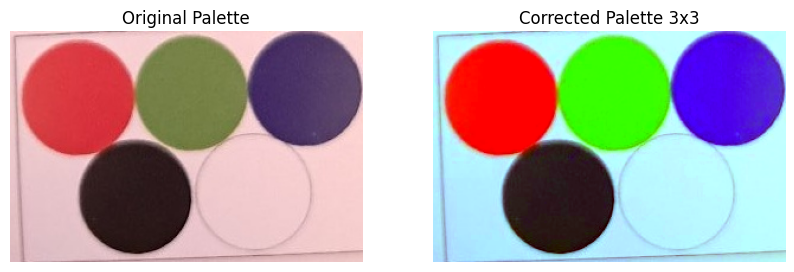

In [11]:
# Reshape the image to a 2D array of pixels (each pixel is a 3-element vector)
h, w, c = palette_img.shape
pixels = palette_img.reshape((-1, 3)).astype(np.float32)

# Apply the color correction matrix to each pixel
corrected_pixels = np.dot(pixels, M)

# Clamp pixel values to the valid range [0, 255]
corrected_pixels = np.clip(corrected_pixels, 0, 255)

# Reshape back to the original image dimensions and convert to uint8
corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)

# Display the corrected palette image alongside the original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Corrected Palette 3x3")
plt.axis("off")
plt.show()


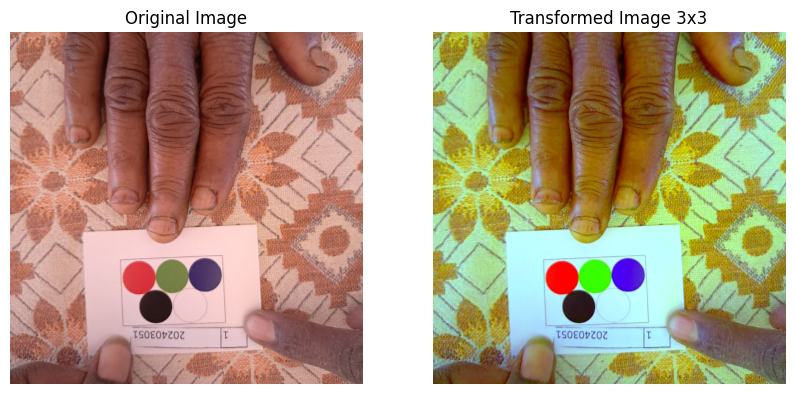

In [12]:
# Reshape the image to a 2D array of pixels (each pixel is a 3-element vector)
real3x3_img = cv2.imread("../Dataset Used/Right Fingernail_files/Images_right_fingernail/1709617374918.jpg")

h, w, c = real3x3_img.shape
pixels = real3x3_img.reshape((-1, 3)).astype(np.float32)

# Apply the color correction matrix to each pixel
corrected_pixels = np.dot(pixels, M)

# Clamp pixel values to the valid range [0, 255]
corrected_pixels = np.clip(corrected_pixels, 0, 255)

# Reshape back to the original image dimensions and convert to uint8
corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)

# Display the corrected palette image alongside the original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(real3x3_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 3x3")
plt.axis("off")
plt.show()


In [15]:
import numpy as np

# Assume meas_arr and ref_arr are already defined as:
# meas_arr: (N, 3) array of measured colors (B, G, R)
# ref_arr:  (N, 3) array of reference colors (B, G, R)

# 1. Extend the measured color array with a column of ones to account for the offset.
ones = np.ones((meas_arr.shape[0], 1), dtype=np.float32)
meas_arr_extended = np.hstack([meas_arr, ones])  # Shape becomes (N, 4)

# 2. Solve for A in the equation:
#      meas_arr_extended * A = ref_arr
# where A will be a (4, 3) matrix.
A, residuals, rank, s = np.linalg.lstsq(meas_arr_extended, ref_arr, rcond=None)

# 3. To get a transform M that works as:
#      corrected_color = M @ [measured_color; 1]   (with [measured_color;1] as a (4,1) column vector)
# we need M to be of shape (3, 4). Since our least-squares solution gives:
#      meas_arr_extended (N, 4) * A (4, 3) = ref_arr (N, 3),
# then we can take the transpose of A:
M_affine = A.T  # This gives a (3, 4) matrix

print("Computed Color Correction Affine Matrix (3x4):")
print(M_affine)


Computed Color Correction Affine Matrix (3x4):
[[  0.7196105    0.4199792    0.15084215 -52.070423  ]
 [  0.3050247    1.0090595    0.10893889 -62.04517   ]
 [  0.16799386   0.12682588   1.0260307  -74.8035    ]]


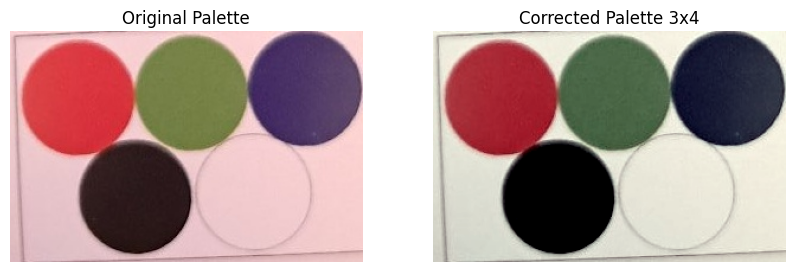

In [16]:
# Reshape the image to a 2D array of pixels (each pixel is a 3-element vector)
h, w, c = palette_img.shape
pixels = palette_img.reshape((-1, 3)).astype(np.float32)

# Extend the pixel array by appending a column of ones (for the offset)
ones = np.ones((pixels.shape[0], 1), dtype=np.float32)
pixels_extended = np.hstack([pixels, ones])  # Now shape is (N, 4)

# Apply the affine color correction transform:
# Each pixel is corrected by: corrected_pixel = M_affine @ [pixel; 1]
# Since M_affine has shape (3, 4), we need to transpose it to multiply with an (N, 4) array.
corrected_pixels = np.dot(pixels_extended, M_affine.T)

# Clamp pixel values to the valid range [0, 255]
corrected_pixels = np.clip(corrected_pixels, 0, 255)

# Reshape back to the original image dimensions and convert to uint8
corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)

# Display the original and corrected palette images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
plt.title("Original Palette")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Corrected Palette 3x4")
plt.axis("off")
plt.show()


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_color_transform(image, transform_matrix):
    """
    Apply a color transformation matrix to an image.
    
    Parameters:
      image: Input image as a numpy array of shape (h, w, 3).
      transform_matrix: A numpy array of shape (3, 3) for a linear transform,
                        or shape (3, 4) for an affine transform (with offset).
                        
    Returns:
      corrected_img: The color-transformed image.
    """
    h, w, c = image.shape
    pixels = image.reshape((-1, 3)).astype(np.float32)
    
    if transform_matrix.shape == (3, 3):
        # For a 3x3 matrix, simply multiply each pixel vector.
        corrected_pixels = np.dot(pixels, transform_matrix.T)
    elif transform_matrix.shape == (3, 4):
        # For a 3x4 affine transform, extend each pixel with an extra 1.
        ones = np.ones((pixels.shape[0], 1), dtype=np.float32)
        pixels_extended = np.hstack([pixels, ones])
        corrected_pixels = np.dot(pixels_extended, transform_matrix.T)
    else:
        raise ValueError("Transform matrix must be of shape (3,3) or (3,4).")
    
    # Clamp values to valid range and reshape back to image shape.
    corrected_pixels = np.clip(corrected_pixels, 0, 255)
    corrected_img = corrected_pixels.reshape((h, w, 3)).astype(np.uint8)
    return corrected_img


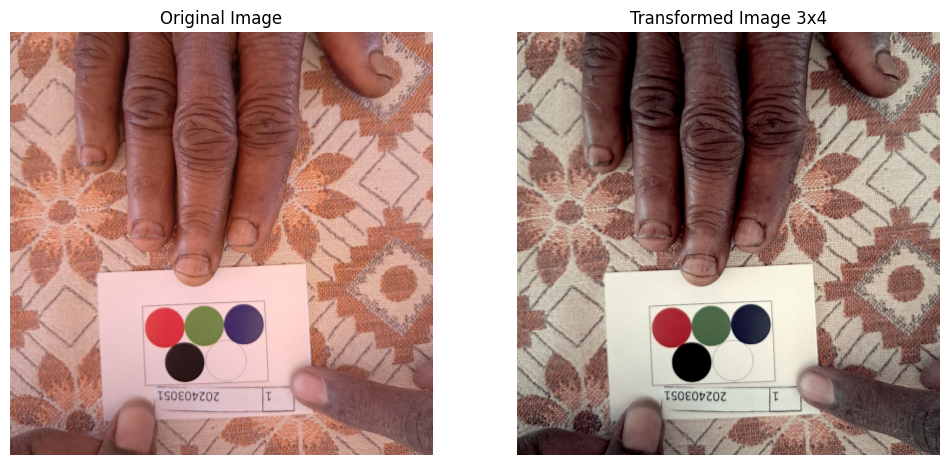

In [18]:
# -----------------------
# Example Usage:
# -----------------------

# Load an example image (replace 'input.jpg' with your image file)
input_img = cv2.imread("../Dataset Used/Right Fingernail_files/Images_right_fingernail/1709617374918.jpg")
if input_img is None:
    raise IOError("Error loading the input image.")

# Choose one of the matrices to apply:
transform_matrix = M_affine  # or M_linear

# Apply the transform to the input image.
corrected_img = apply_color_transform(input_img, transform_matrix)

# Display the original and corrected images side by side.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 3x4")
plt.axis("off")
plt.show()
